# Project: Apple Stock Price Prediction Using LSTM

This project aims to predict the stock price of Apple Inc. using a Long Short-Term Memory (LSTM) neural network. LSTM is a type of recurrent neural network (RNN) well-suited for modeling time series data due to its ability to capture long-term dependencies. Historical stock prices are used to train the model, and its performance is evaluated by comparing the predicted values with actual prices over a selected time period. The notebook covers data preprocessing, model construction, training, evaluation, and visualization of the results.

In [1]:
# pip install yfinance

In [2]:
import numpy as np
import random
import tensorflow as tf
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Input, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Data overview

In [4]:
data = yf.download('AAPL', start='2015-01-01', end='2024-12-31')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [5]:
data.head(3)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.320435,24.789804,23.879983,24.778681,212818400
2015-01-05,23.635288,24.169168,23.448431,24.089086,257142000
2015-01-06,23.637512,23.897778,23.274918,23.699798,263188400


In [6]:
# Keep only the closing price
df = data[['Close']].copy()
df.dropna(inplace=True)

In [7]:
print('The maximum price:', data['Close'].max())
print('The minimum price:', data['Close'].min())
print('The average price:', data['Close'].mean())
print('The median price:', data['Close'].median())

The maximum price: Ticker
AAPL    258.735504
dtype: float64
The minimum price: Ticker
AAPL    20.67454
dtype: float64
The average price: Ticker
AAPL    94.117873
dtype: float64
The median price: Ticker
AAPL    64.593887
dtype: float64


# Preprocessing

In [8]:
# 1. Splitting the data
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]

In [9]:
# 2. Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train_data)
scaled_test = scaler.transform(test_data)

In [10]:
# 3. creating sequences
time_step = 60 
def create_sequences(data, time_step):
    X = []
    y = []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])  # Use the past `time_step` days
        y.append(data[i, 0])              # Predict the `i`-th day's price
    return np.array(X), np.array(y)

In [11]:
X_train, y_train = create_sequences(scaled_train, time_step)
X_test, y_test = create_sequences(scaled_test, time_step)

In [12]:
# 4. reshape for LSTM: [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# training model

In [13]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1], 1)))  
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
early_stop = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)

In [15]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, callbacks=[early_stop])

Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0777
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 6.5436e-04
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 6.0549e-04
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 5.8420e-04
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 5.6700e-04
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 5.4969e-04
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 5.2995e-04
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 5.1235e-04
Epoch 9/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 5.0230e-04
Epoch 10/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 5.0120e-04
Epoch 11/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 5.0906e-04
Epoch 12/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 5.1780e-04
Epoch 13/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 5.1469e-04
Epoch 14/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 5.0485e-04
Epoch 15/50
61/61 ━

# Model evaluation

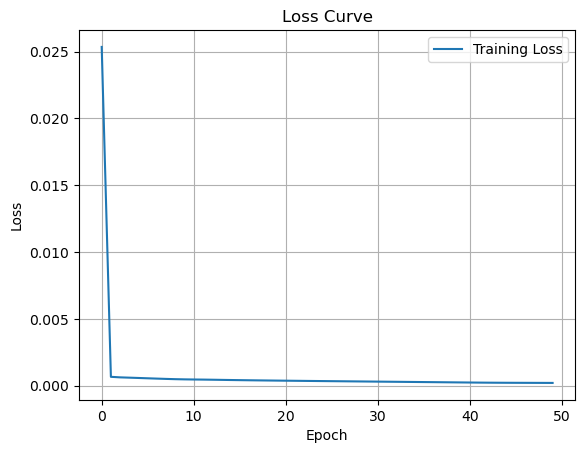

In [16]:
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Forcasting

In [17]:
y_pred = model.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


In [18]:
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

## Plotting the actual and predicted stock price

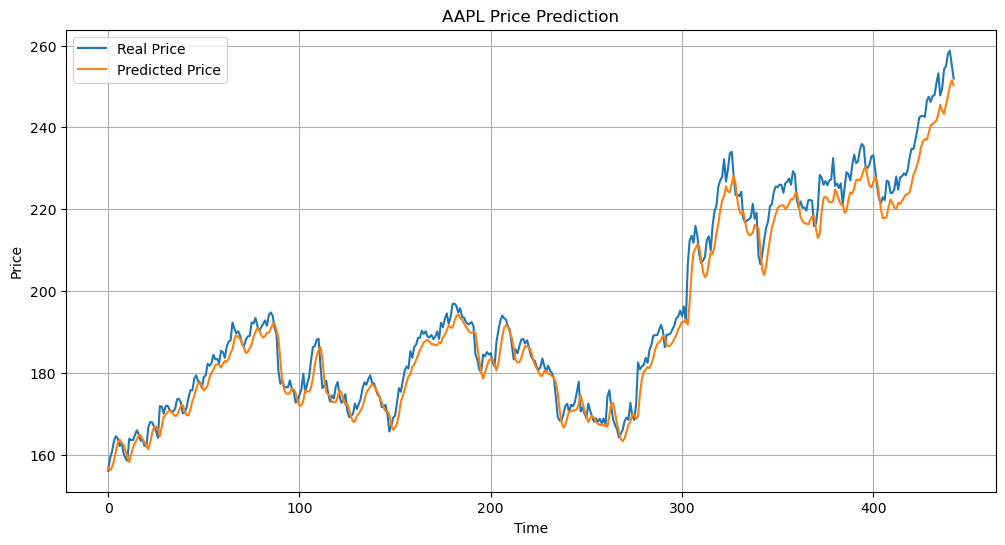

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Real Price')
plt.plot(y_pred_inv, label='Predicted Price')
plt.title('AAPL Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

## Plotting the residuals of the predictions

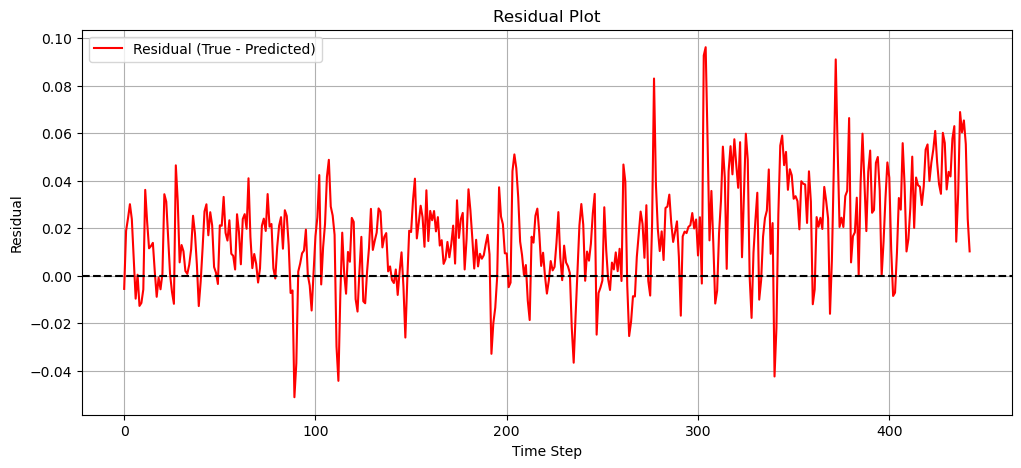

In [20]:
# Residual Plot (True - Predicted)
residuals = y_test.flatten() - y_pred.flatten()

plt.figure(figsize=(12, 5))
plt.plot(residuals, label='Residual (True - Predicted)', color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Time Step')
plt.ylabel('Residual')
plt.legend()
plt.grid(True)
plt.show()

## Comparing the actual and predicted stcok price on the whole period

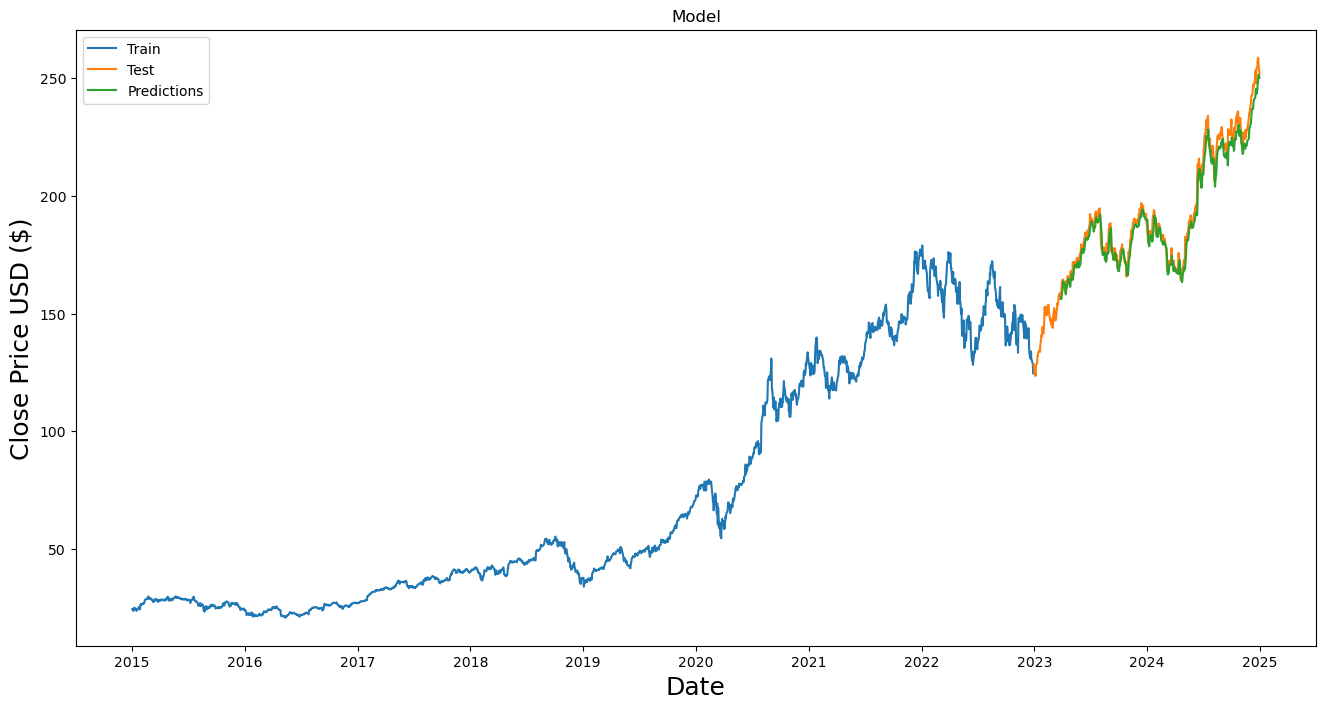

In [22]:
test_data_new = test_data.copy()

test_data_new['Predictions'] = np.nan
start_index = time_step
end_index = start_index + len(y_pred_inv)
test_data_new.iloc[start_index:end_index, test_data_new.columns.get_loc('Predictions')] = y_pred_inv.flatten()

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train_data['Close'], label='Train')
plt.plot(test_data_new['Close'], label='Test')  
plt.plot(test_data_new['Predictions'], label='Predictions') 
plt.legend(loc='upper left')
plt.show()